# Categorizing Countries Using Socio-Economic and Health Factors

### Objective
To categorize countries using socio-economic and health factors that determine the overall development of the country.

### Data Source
The dataset is obtained from **Unsupervised Learning on Country Data** on Kaggle, provided by Rohan Kokkula. The original source of the data is unknown.

---

### Problem Statement
HELP International has raised $100 million. The CEO wants to use this money strategically and effectively by funding programs in the countries most in need of aid. Your task is to categorize the countries using socio-economic and health factors to determine their overall development and suggest how the funds should be allocated among the countries.
### About HELP International
HELP International aims to create a network of changemakers and social entrepreneurs who understand the complexities of poverty and actively work to improve the quality of life for vulnerable populations.

---
## Dataset Overview

This dataset contains socio-economic and health-related indicators for various countries. Below is an overview of the columns and their descriptions:

### Columns and Descriptions

1. **country**  
   - **Description**: The name of the country.

2. **child_mort**  
   - **Description**: Deaths of children under 5 years of age per 1,000 live births.  
   - **Data Type**: Float

3. **exports**  
   - **Description**: Exports of goods and services per capita, given as a percentage of the GDP per capita.  
   - **Data Type**: Float

4. **health**  
   - **Description**: Total health spending per capita, given as a percentage of GDP per capita.  
   - **Data Type**: Float

5. **imports**  
   - **Description**: Imports of goods and services per capita, given as a percentage of GDP per capita.  
   - **Data Type**: Float

6. **income**  
   - **Description**: Net income per person.  
   - **Data Type**: float

7. **inflation**  
   - **Description**: The measurement of the annual growth rate of the total GDP.  
   - **Data Type**: Float

8. **life_expec**  
   - **Description**: The average number of years a newborn child would live if the current mortality patterns remain the same.  
   - **Data Type**: Float

9. **total_fer**  
   - **Description**: The number of children that would be born to each woman if the current age-fertility rates remain the same.  
   - **Data Type**: Float

10. **gdpp**  
   - **Description**: The GDP per capita, calculated as the total GDP divided by the total population.  
   - **Data Type**: Int

### Summary

This dataset provides a comprehensive view of socio-economic and health-related indicators, including child mortality, economic outputs (exports, imports, GDP), and health expenditure. It can be used for:
- Analyzing relationships between health and economic factors.
- Predicting economic or health outcomes.
- Comparing country performance on socio-economic indicators.



---

### Deliverables
1. Jupyter Notebook containing:
   - All code, visualizations, and markdown cells with observations.
   - Clear explanations and justifications for the number of clusters and aid allocation strategy.
2. Detailed breakdown of funding allocation among clusters and countries.

---

### 1. Data Preprocessing
- **Load the Dataset:** Import `Country-data.csv` into a pandas DataFrame.
- **Explore the Data:** Use `pandas.DataFrame.describe` to summarize the data and `pandas.DataFrame.info` to check data types and missing values.
- **Data Cleaning:** 
  - Check for and remove duplicate entries.
  - Handle missing values and ensure data types are correct.
  - Separate the `country` column into a separate DataFrame for later use.
---

In [2]:
# Importing pandas library as pd
import pandas as pd

In [3]:
# Storing 'Country-data.csv' dataframe to variable called 'data'
data = pd.read_csv('Country-data.csv')

In [4]:
# Exploring the first 5 rows of the dataset. 
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Statistical analysis summary for the each column
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Summary of Dataset Statistics

### **child_mort (Child Mortality)**
- **Average:** About 38 children per 1,000 die before the age of five.
- **Range:** From 2.6 (low mortality) to 208 (very high mortality), showing a large disparity among countries.
- **Percentiles:** Most countries have child mortality below 62.1 (75th percentile).

---

### **exports (Exports as % of GDP)**
- **Average:** Around 41% of GDP is from exports.
- **Range:** Very low exports (0.109%) to high exports (200%).
- **Percentiles:** Most countries have exports between 23.8% and 51.35% of GDP.

---

### **health (Health Spending as % of GDP)**
- **Average:** Around 6.82% of GDP is spent on health.
- **Range:** From 1.81% (low health investment) to 17.9% (high investment).
- **Percentiles:** Health spending is generally modest, with most countries spending below 8.6% (75th percentile).

---

### **imports (Imports as % of GDP)**
- **Average:** About 46.89% of GDP is spent on imports.
- **Range:** From 0.0659% (very low) to 174% (extremely high imports).
- **Percentiles:** Most countries import between 30.2% and 58.75% of their GDP.

---

### **income (Income per Capita)**
- **Average:** 17,144 per person, but there is a large spread in income levels.
- **Range:** From 609 (low-income) to 125,000 (high-income countries).
- **Percentiles:** Most countries have income below $22,800 (75th percentile).

---

### **inflation (Inflation Rate)**
- **Average:** 7.78%, indicating moderate inflation across countries.
- **Range:** From -4.21% (deflation) to 104% (very high inflation).
- **Percentiles:** Most countries have inflation below 10.75% (75th percentile), but outliers exist.

---

### **life_expec (Life Expectancy)**
- **Average:** 70.56 years.
- **Range:** From 32.1 years (very low) to 82.8 years (high life expectancy).
- **Percentiles:** Most countries have life expectancy above 65.3 years (25th percentile).

---

### **total_fer (Total Fertility Rate)**
- **Average:** 2.95 children per woman.
- **Range:** From 1.15 (low fertility) to 7.49 (high fertility).
- **Percentiles:** Most countries have fertility rates between 1.8 and 3.88 children per woman.

---

### **gdpp (GDP per Capita)**
- **Average:** 12,964 per person.
- **Range:** From 231 (low GDP) to 105,000 (high GDP).
- **Percentiles:** Most countries have GDP per capita below 14,050 (75th percentile), but a few outliers drive up the maximum.

---

## General Observations
- There is a wide variation across all indicators, showing the economic and health disparities among countries.
- High-income and low-income countries show significant differences in child mortality, life expectancy, and health spending.
- Fertility rates and life expectancy tend to be inversely related (lower fertility rates in countries with higher life expectancy).



In [6]:
# Checking for missing values and the columns data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
# Changing 'income' column to a float
data['income'] = data['income'].astype(float)

In [8]:
# Checking the dtypes again
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [9]:
# Finding missing values in the data. 
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
# Finding duplicated values using .duplicated() and adding the total duplicated values using .sum()
data.duplicated().sum()

0

### Summary
The data types in the dataset are consistent. However, the data type of **income** has been changed from `int` to `float`.  
There are no missing values and no duplicated rows in the dataset.
---

In [11]:
# Splitting the data into features and label. label = 'country' because our goal is to provide which country needs help with basic amenities and relief.
features = data.drop(columns = ['country'])
label = data['country']

In [12]:
# Making sure our dataset have been splitted properly
features

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553
1,16.6,28.00,6.55,48.6,9930.0,4.490,76.3,1.65,4090
2,27.3,38.40,4.17,31.4,12900.0,16.100,76.5,2.89,4460
3,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530
4,10.3,45.50,6.03,58.9,19100.0,1.440,76.8,2.13,12200
5,14.5,18.90,8.10,16.0,18700.0,20.900,75.8,2.37,10300
6,18.1,20.80,4.40,45.3,6700.0,7.770,73.3,1.69,3220
7,4.8,19.80,8.73,20.9,41400.0,1.160,82.0,1.93,51900
8,4.3,51.30,11.00,47.8,43200.0,0.873,80.5,1.44,46900
9,39.2,54.30,5.88,20.7,16000.0,13.800,69.1,1.92,5840


###  Data Visualization
- **Correlation Matrix:** Use `seaborn.heatmap` to visualize feature correlations.
- **Pairplots:** Generate scatter plots and histograms using `seaborn.pairplot` for better feature understanding.
- **Observations:** Use markdown to explain insights and observations from these visualizations.
---

In [13]:
# Improting seaborn packages to visualize or data
import seaborn as sns

In [14]:
# Using feature.corr() to see the correlation between features
correlation = features.corr()
correlation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


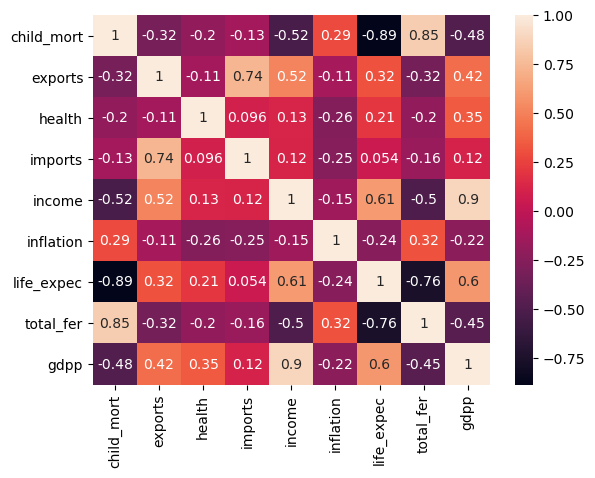

In [15]:
import matplotlib.pyplot as plt
# Using heatmap for our correlation
sns.heatmap(features.corr(), annot = True)
plt.show()

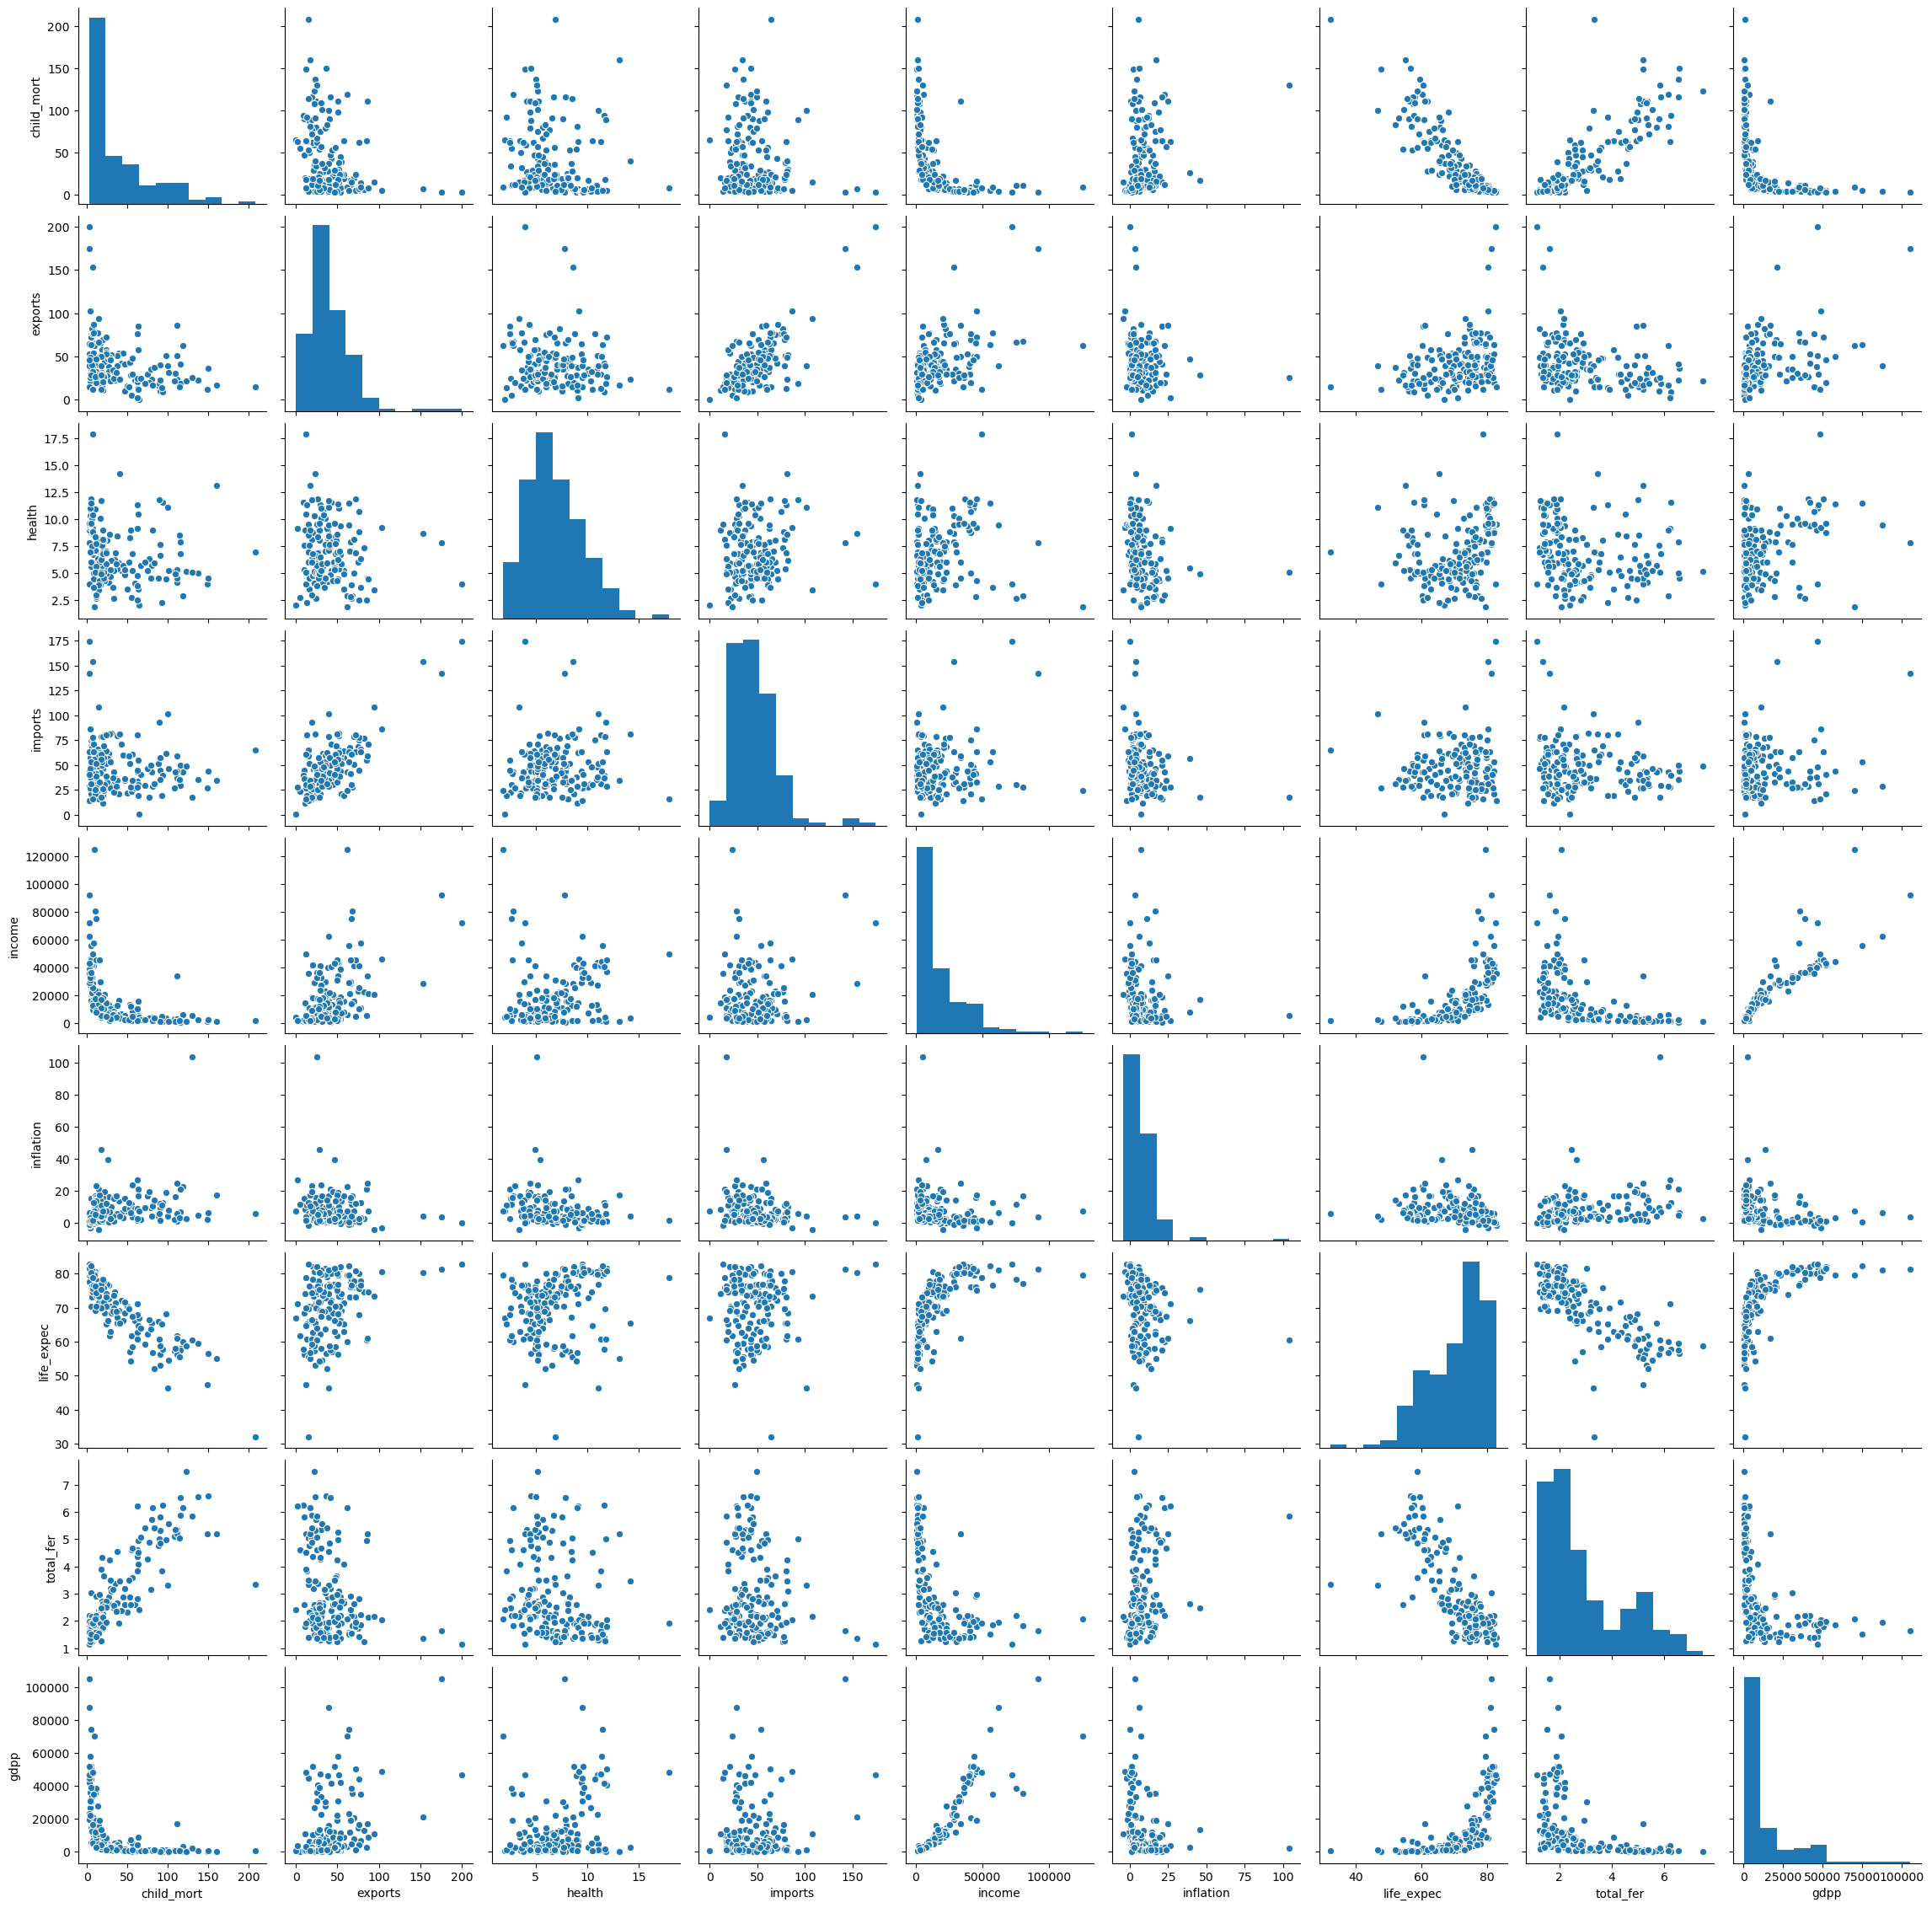

In [16]:
# Pairplots to see histograms and scatterplots of our features
sns.pairplot(features)
plt.show()

## Correlation Findings and Key Impacts

### Correlation Analysis Table

| **Variable**               | **Strong Correlations**                                                                                     | **Moderate Correlations**                                                                                 | **Weak Correlations**                                                     |
|-----------------------------|-----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------|
| **Child Mortality (child_mort)** | - Negative with Life Expectancy (-0.89): Higher child mortality means lower life expectancy.              | - Negative with Income (-0.52): Lower income is linked to higher child mortality.                         | - Positive with Total Fertility Rate (0.85): Higher child mortality is linked to higher fertility. |
| **Exports**                |                                                                                                           | - Positive with Income (0.52): Higher exports are linked to higher income.                                | - Positive with Imports (0.74): Countries with higher exports tend to import more. |
| **Health Spending (health)** |                                                                                                           | - Positive with GDP Per Capita (0.35): More health spending correlates with wealthier countries.           | - Positive with Life Expectancy (0.21): Higher health spending slightly improves life expectancy.  |
| **Imports**                | - Positive with Exports (0.74): Countries importing more often export more.                               |                                                                                                           | - Negative with Inflation (-0.25): Higher imports are associated with lower inflation.    |
| **Income**                 | - Positive with GDP Per Capita (0.90): Higher income strongly drives GDP per capita.                      | - Positive with Life Expectancy (0.61): Higher income supports longer life expectancy.                    | - Negative with Child Mortality (-0.52): Higher income reduces child mortality.  |
| **Inflation**              |                                                                                                           |                                                                                                           | - Negative with Health (-0.26): Higher health spending is associated with lower inflation.<br>- Negative with Exports (-0.11): Countries with high exports tend to have lower inflation. |
| **Life Expectancy (life_expec)** | - Negative with Child Mortality (-0.89): Higher life expectancy lowers child mortality.                  | - Positive with Income (0.61): Higher income improves life expectancy.                                    | - Negative with Total Fertility Rate (-0.76): Countries with higher life expectancy have lower fertility rates. |
| **Total Fertility Rate (total_fer)** | - Positive with Child Mortality (0.85): Higher fertility rates are linked to higher child mortality.   | - Negative with Income (-0.50): Higher income is associated with lower fertility rates.                   | - Negative with Life Expectancy (-0.76): Higher fertility rates mean shorter life expectancy.       |
| **GDP Per Capita (gdpp)**  | - Positive with Income (0.90): High GDP per capita is driven by higher income.                            | - Positive with Life Expectancy (0.60): Higher GDP per capita supports longer life expectancy.             | - Negative with Total Fertility Rate (-0.45): Higher GDP per capita is associated with lower fertility rates.  |

---

## Observations
- **Life expectancy, income, and GDP per capita:** Are key indicators of development. They show strong positive relationships with each other while negatively correlating with child mortality and fertility rates.
- **Exports and Imports:** Closely linked and contribute positively to income and GDP per capita, while their higher values correlate with **lower inflation rates**.
- **Inflation:** Negatively correlated with health spending, imports, and exports, indicating that countries with robust trade and higher investments in health tend to maintain lower inflation.
- **Child Mortality and Total Fertility Rate:** Have a strong inverse relationship with life expectancy, showing that improving one often improves the other.
---

## 2. Modeling
- **Data Scaling:** Use `sklearn.preprocessing.StandardScaler` to scale the data. Print the header.

In [17]:
# Importing the library to be use for scalling the data
from sklearn.preprocessing import StandardScaler

In [18]:
# Data Scalling using 'StandardScaler' to scale features (only)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Converting scaled_features into a dataframe for better readability
features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Printing the scaled features data frame
features_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,1.063687e-16,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [19]:
#Printing the header
features_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


The `StandardScaler` has successfully normalized all features to a standard scale with:

- **Mean ≈ 0:** The features are centered around zero.
- **Standard Deviation ≈ 1:** The features have been scaled to unit variance.
- **Comparable Scales:** All features now contribute equally, avoiding bias caused by differences in their original scales.

The dataset is now ready for clustering and other machine learning algorithms.

---

- **Clustering:** 
  - Apply `sklearn.cluster.KMeans` to cluster the data.
  - Experiment with `n_clusters` in the range `[2, 10]`.
  - Calculate and store the silhouette score for each value of `n_clusters`.

In [20]:
# Importing the library to be used for clustering the data
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


In [21]:
# n_clusters in the range [2, 10]
n_cluster_range = range(2, 11)

# Empty list silhouetter_score to append the scores during iteration. 
silhouette_scores = []

for n_clusters in n_cluster_range:
    '''
    This is a For loop to iterate over the range of cluster numbers and calculate KMeans clustering and silhouette scores
    Step 1: Initialize KMeans with the current number of clusters (n_clusters)
    Step 2: Fit the KMeans model on the scaled features and predict cluster labels. This assigns each data point to one of the n_clusters
    Step 3: Calculate the silhouette score for the current clustering. 
    Silhouette score measures how well each data point fits within its cluster and how distinct the clusters are.
    Step 4: Append the silhouette score for this n_clusters to the list for later analysis
    '''
    
    kmeans = KMeans(n_clusters=n_clusters, random_state = 42) # Step 1
    cluster_labels = kmeans.fit_predict(features_df) # Step 2
    
    score = silhouette_score(features_df, cluster_labels) # Step 3
    silhouette_scores.append(score) # Step 4


In [22]:
# Displaying the silhouette scores
print("Silhouette Scores for each number of clusters:")

for n_clusters, score in zip(n_cluster_range, silhouette_scores):
    print(f"{n_clusters} clusters: Silhouette Score = {score:.4f}")

Silhouette Scores for each number of clusters:
2 clusters: Silhouette Score = 0.2874
3 clusters: Silhouette Score = 0.2833
4 clusters: Silhouette Score = 0.3014
5 clusters: Silhouette Score = 0.2993
6 clusters: Silhouette Score = 0.2273
7 clusters: Silhouette Score = 0.2491
8 clusters: Silhouette Score = 0.2394
9 clusters: Silhouette Score = 0.2306
10 clusters: Silhouette Score = 0.1999


---
- **Optimal Clustering:** 
  - Create a plot of silhouette score vs. `n_clusters`.
  - Justify the number of clusters for this use case.
  - Save the corresponding model as the best model.

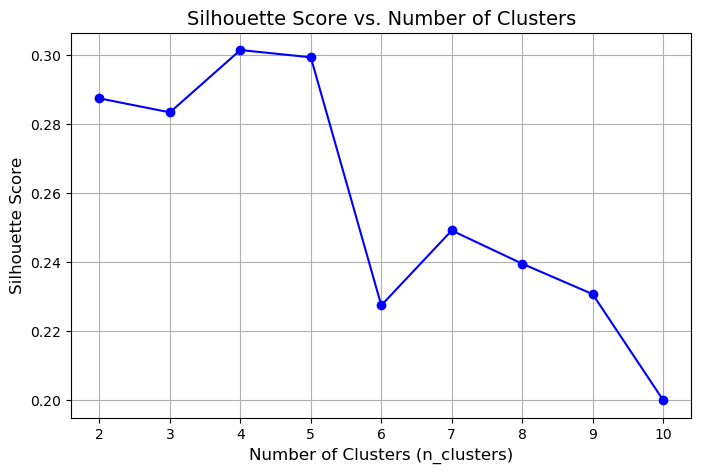

In [23]:
import matplotlib.pyplot as plt

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(n_cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')

# Add labels, title, and grid for better visualization
plt.title('Silhouette Score vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (n_clusters)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()



---
## Optimal Number of Cluster: 3

### Justification
Eventhough high silhouette score acheived for n_clusters=4, when we analyze the model, we found that, for n_cluster=3, clusters have good balance of data points. for n_clusters=4, one of the cluster have 3 countries and it is widely spread across nearest cluster. When it is changed to 3 clusters, those 3 country and nearest cluster merged into single cluster. So, while allocationg funds, we can give minimum fund to these cluster and can focus on countries in other two cluster.


## 3. Conclusions
- **Cluster Visualization:** Choose two features and create a scatter plot, coloring points according to their clusters.

- **Cluster Distribution:** Generate a histogram showing the number of countries in each cluster and comment on the distribution.
- **Cluster Analysis:** 
  - Print the names of countries in each cluster.
  - Comment on the characteristics of each cluster, from those that need aid the most to those that need it the least.
---

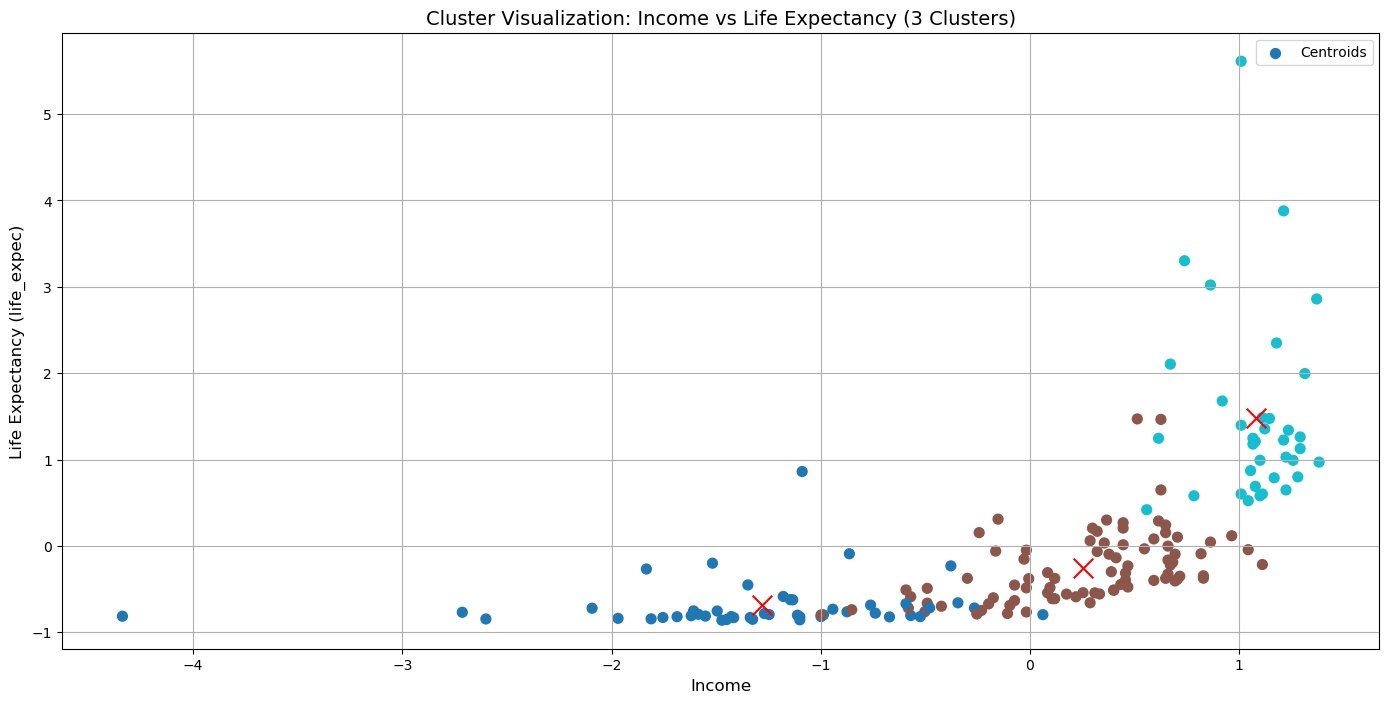

In [24]:
# Fit KMeans using the optimal number of clusters and add cluster labels
optimal_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
features_df['Cluster'] = kmeans_optimal.fit_predict(features_df)  # Add cluster labels

import matplotlib.pyplot as plt

# Scatter plot to visualize clusters using 'income' and 'life_expectancy'
plt.figure(figsize=(17, 8))

# Plot the data points, coloring them based on their cluster labels
plt.scatter(features_df['life_expec'], features_df['income'], c=features_df['Cluster'], cmap='tab10', s=50)

# Add labels and title
plt.title('Cluster Visualization: Income vs Life Expectancy (3 Clusters)', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Life Expectancy (life_expec)', fontsize=12)


# Highlight cluster centroids
plt.scatter(
    kmeans_optimal.cluster_centers_[:, features_df.columns.get_loc('life_expec')], 
    kmeans_optimal.cluster_centers_[:, features_df.columns.get_loc('income')], 
    c='red', s=200, marker='x', label='Centroids'
)


# Add legend and grid
plt.legend(['Centroids'])
plt.grid(True)

# Show the plot
plt.show()



In [25]:
# Add country names and cluster labels to the DataFrame
clustered_countries = features_df.copy()
clustered_countries['Country'] = label  # Add country names
clustered_countries['Cluster'] = kmeans_optimal.labels_  # Add cluster labels


# Printing countries in each cluster
print("Countries in Each Cluster:\n")

for cluster in clustered_countries['Cluster'].unique():
    '''
    This code is used to group and print the countries in each cluster after clustering has been performed.
    The code iterates through each unique cluster label, filters the DataFrame for rows belonging to that cluster, and collects the country names into a list.
    It then prints the cluster number and the corresponding list of countries in a clean, readable format.
    '''
    countries = clustered_countries[clustered_countries['Cluster'] == cluster]['Country'].tolist()
    print(f"Cluster {cluster}: {', '.join(countries)}\n")


Countries in Each Cluster:

Cluster 0: Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia

Cluster 1: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, M

- **Aid Allocation:** 
  - Describe which countries will receive funds and the amount allocated to each cluster.
  - Justify the allocation strategy.
---

## Characteristics and Priority Commentary

### **Cluster 0: Low Income, Low Life Expectancy(undeveloped countries)**
- **Characteristics:** Countries with the lowest income and shortest life expectancy.
- These countries face severe challenges in healthcare, infrastructure, and basic needs.
- **Aid Priority:** **Highest Priority.** They require significant aid for economic and health improvements.
- **Allocation strategy**: 57 % of total fund. That is 57 million.

### **Cluster 1: Moderate Income, Moderate Life Expectancy(developing countries)**
- **Characteristics:** Countries transitioning economically and better life expectancy but still struggling with healthcare and social development.
- **Aid Priority:** **Second Highest Priority.** Focused aid can help sustain growth and improve healthcare systems.
- **Allocation strategy**: 40 % of total fund. That is 40 million

### **Cluster 2: High Income, High Life Expectancy(developed countries)**
- **Characteristics:** Developed countries with strong economies and high life expectancy.
- These countries are self-sufficient and face minimal developmental challenges.
- **Aid Priority:** **Lowest Priority.** Little to no external aid is needed.
- **Allocation strategy**:  3 % of total fund. That is 3 million.
